In [9]:
### for data generated by MERSCOPE
### retreive "cell_metadata.csv", "cell_by_gene.csv", and "detected_transcripts.csv" files from each "region_n" folder in merfish_output directory
### preserve the "region_n" direcotry structures 

In [1]:
import os
import pandas as pd
import numpy as np
from glob import glob
from copy import deepcopy

import scanpy as sc
import anndata as an

import matplotlib
from matplotlib import pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
from matplotlib.pyplot import rc_context

In [58]:
region_list = glob(str(os.getcwd()+'/region_*/detected_transcripts.csv'))
region_list


transcript_list = []
for n, region in enumerate(region_list):
    merfish_transcripts = pd.read_csv(region, index_col=0)
    print('region_', str(n), ' ', len(merfish_transcripts), ' trancripts')
    merfish_transcripts['region'] = n  
    transcript_list.append(merfish_transcripts)
    
transcripts_all = pd.concat(transcript_list, axis=0).reset_index()
transcript_list = []
transcripts_all = transcripts_all.drop(['index'], axis=1)

transcripts_all

0   809259  trancrtips
1   1088826  trancrtips
2   1748626  trancrtips


barcode_id    global_x   global_y  global_z           x          y  \
0               114  589.293000  2368.0498       2.0   305.38837  1306.9058   
1               124  851.950900  1614.8429       0.0  1133.95230  2036.9282   
2               124  810.814500  1614.8092       1.0   753.05963  2036.6162   
3               124  835.816900  1614.8215       1.0   984.56335  2036.7312   
4               282  883.173030  1614.4535       1.0  1423.04580  2033.3234   
...             ...         ...        ...       ...         ...        ...   
3646706         392   65.615430  9076.5560       3.0  1275.33020  1728.8707   
3646707         456   -5.718344  9268.0690       0.0   584.25230  1647.0502   
3646708         392   20.836618  9232.0900       3.0   830.13160  1313.9116   
3646709         456   32.639560  9412.3740       0.0   908.78815  1126.0000   
3646710         456   56.230385  9427.7050       0.0  1127.22170  1267.9562   

          fov    gene       transcript_id  cell_id  region  
0           0    Flt1  ENSMUST00000031653       -1       0  
1           3   Calca  ENSMUST00000032906       -1       0  
2           3   Calca  ENSMUST00000032906       -1       0  
3           3   Calca  ENSMUST00000032906       -1       0  
4           3   Myh11  ENSMUST00000090287       -1       0  
...       ...     ...                 ...      ...     ...  
3646706  2496  Sh3rf3  ENSMUST00000153031       -1       2  
3646707  2497    Lgi2  ENSMUST00000199942       -1       2  
3646708  2497  Sh3rf3  ENSMUST00000153031       -1       2  
3646709  2498    Lgi2  ENSMUST00000199942       -1       2  
3646710  2498    Lgi2  ENSMUST00000199942       -1       2  

[3646711 rows x 11 columns]

R     =   0.2543208297467531
471


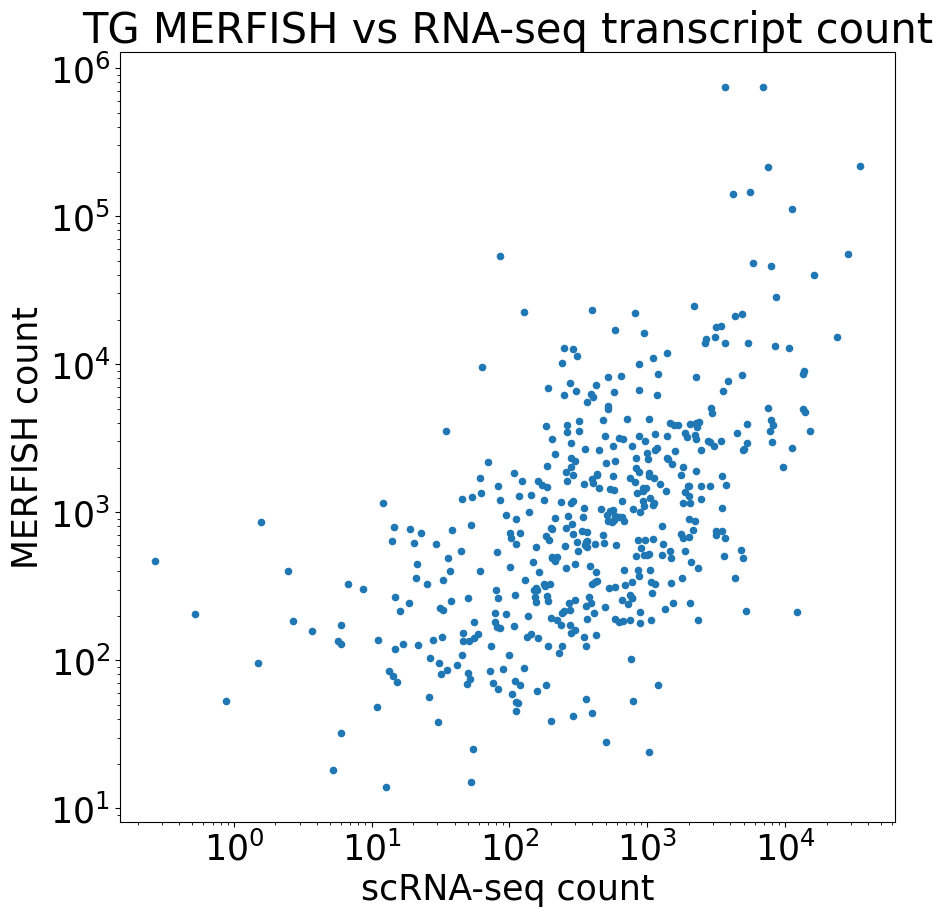

In [66]:
## check transcript count correlation between MERFISH and bulk RNA-seq
## r > 0.6 indicates good qualtiy (0.8 for mouse retina)

bulk_rna = pd.read_csv('tg_bulk.csv', index_col = 0)
#Female (total read; TG)
bulk_rna = bulk_rna['average'].to_frame(name="RNA")

merfish_transcripts_count = transcripts_all.gene.value_counts()


matplotlib.rcParams.update({'font.size': 25})

bulk_rna['merfish']=merfish_transcripts_count
bulk_rna= bulk_rna.dropna()

from sklearn.metrics import r2_score
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
ax.scatter(bulk_rna.iloc[:, 0], bulk_rna.iloc[:, 1], s=20, alpha=1)
ax.set_yscale('log')
ax.set_xscale('log')
plt.title('TG MERFISH vs RNA-seq transcript count')
plt.ylabel('MERFISH count')
plt.xlabel('scRNA-seq count')

corr_matrix = np.corrcoef(bulk_rna.iloc[:, 0], bulk_rna.iloc[:, 1])
corr = corr_matrix[0,1]
R_sq = corr**2

print('R     =   ' + str(corr))
print(len(bulk_rna))

In [122]:
### import cell by gene matrices
region_list = glob(str(os.getcwd()+'/region_*/cell_by_gene.csv'))
region_list

gex_list = []
for n, region in enumerate(region_list):
    merfish_gex = pd.read_csv(region, index_col=0)
    merfish_gex['region'] = n  
    gex_list.append(merfish_gex)
    print(n)
gex_all = pd.concat(gex_list, axis=0).reset_index()
gex_list = []

gex_all.index = gex_all['cell']
gex_all = gex_all.drop(['cell'], axis=1)

gex_all

0
1
2


Ngfr  Th  Cdh1  Cdh4  Pdgfra  Ccl3  Efnb2  Cpa3  Axl  \
cell                                                                        
1257883200001100001     0   0     0     0       0     0      0     0    0   
1257883200001100004     0   0     0     0       0     0      0     0    0   
1257883200001100006     0   0     0     0       0     0      0     0    0   
1257883200001100009     0   0     0     0       0     0      0     0    0   
1257883200001100010     0   0     0     0       0     0      0     0    0   
...                   ...  ..   ...   ...     ...   ...    ...   ...  ...   
1257884900272200099     0   0     0     0       0     0      0     0    0   
1257884900272200100     0   0     0     0       0     0      0     0    0   
1257884900272200101     0   0     0     0       0     0      0     0    0   
1257884900272200103     0   0     0     0       0     0      0     0    0   
1257884900272200104     0   0     0     0       0     0      0     0    0   

                     Tgfb1  ...  Blank-51  Blank-52  Blank-53  Blank-54  \
cell                        ...                                           
1257883200001100001      0  ...         0         0         0         0   
1257883200001100004      0  ...         0         0         0         0   
1257883200001100006      0  ...         0         0         0         0   
1257883200001100009      0  ...         0         0         0         0   
1257883200001100010      0  ...         0         0         0         0   
...                    ...  ...       ...       ...       ...       ...   
1257884900272200099      0  ...         0         0         0         0   
1257884900272200100      0  ...         0         0         0         0   
1257884900272200101      0  ...         0         0         0         0   
1257884900272200103      0  ...         0         0         0         0   
1257884900272200104      0  ...         0         0         0         0   

                     Blank-55  Blank-56  Blank-57  Blank-58  Blank-59  region  
cell                                                                           
1257883200001100001         0         0         0         0         0       0  
1257883200001100004         0         0         0         0         0       0  
1257883200001100006         0         0         0         0         0       0  
1257883200001100009         0         0         0         0         0       0  
1257883200001100010         0         0         0         0         0       0  
...                       ...       ...       ...       ...       ...     ...  
1257884900272200099         0         0         0         0         0       2  
1257884900272200100         0         0         0         0         0       2  
1257884900272200101         0         0         0         0         0       2  
1257884900272200103         0         0         0         0         0       2  
1257884900272200104         0         0         0         0         0       2  

[213195 rows x 551 columns]

In [123]:
### import metadata
region_list = glob(str(os.getcwd()+'/region_*/cell_metadata.csv'))
region_list

meta_list = []
for n, region in enumerate(region_list):
    merfish_meta = pd.read_csv(region, index_col=0)
    merfish_meta['region'] = n  
    meta_list.append(merfish_meta)
    
meta_all = pd.concat(meta_list, axis=0).reset_index()
meta_list = []

meta_all.index = meta_all['EntityID']
meta_all = meta_all.drop(['EntityID'], axis=1)

meta_all

fov       volume      center_x      center_y  \
EntityID                                                             
1257883200001100001    82   229.942938   1531.958513    198.119085   
1257883200001100004    82   211.948185   1553.577639    199.535339   
1257883200001100006    82  1032.719040   1565.944700    200.994110   
1257883200001100009    82   334.579117   1578.410988    199.230624   
1257883200001100010    82    78.647894   1584.006459    199.483607   
...                   ...          ...           ...           ...   
1257884900272200099  1384   527.675572  10132.274520  12433.485677   
1257884900272200100  1384   633.854096  10109.716996  12437.153825   
1257884900272200101  1384   195.592250  10104.715814  12436.707323   
1257884900272200103  1384   736.261266  10114.490903  12442.388427   
1257884900272200104  1384   398.646747  10120.476709  12440.140589   

                            min_x         min_y         max_x         max_y  \
EntityID                                                                      
1257883200001100001   1528.101476    196.342661   1535.658095    199.792814   
1257883200001100004   1551.189662    196.966063   1555.884644    202.045610   
1257883200001100006   1558.881726    196.578268   1571.757589    206.294086   
1257883200001100009   1575.195318    196.565154   1581.964091    202.546475   
1257883200001100010   1582.829354    197.424228   1585.218445    201.526113   
...                           ...           ...           ...           ...   
1257884900272200099  10128.077324  12425.131556  10136.947374  12437.051416   
1257884900272200100  10105.494873  12431.965831  10114.415176  12442.447152   
1257884900272200101  10102.367304  12433.691589  10107.179012  12439.636769   
1257884900272200103  10109.111522  12435.237350  10118.670587  12447.752149   
1257884900272200104  10117.567081  12435.779621  10123.623557  12444.499127   

                     anisotropy  transcript_count  ...  DAPI_high_pass  \
EntityID                                           ...                   
1257883200001100001    2.197661                 0  ...    6.221398e+05   
1257883200001100004    1.192546                 0  ...    3.826383e+05   
1257883200001100006    1.334234                 0  ...    1.288786e+06   
1257883200001100009    1.345642                 0  ...    5.161898e+05   
1257883200001100010    1.724629                 0  ...    1.777153e+05   
...                         ...               ...  ...             ...   
1257884900272200099    1.379475                 8  ...    3.435215e+06   
1257884900272200100    1.225728                16  ...    3.695376e+06   
1257884900272200101    1.616078                 4  ...    1.423764e+06   
1257884900272200103    1.583571                10  ...    4.958308e+06   
1257884900272200104    1.770662                 0  ...    3.052228e+06   

                       PolyT_raw  PolyT_high_pass  Cellbound3_raw  \
EntityID                                                            
1257883200001100001    5560759.0     9.077282e+05       2715927.0   
1257883200001100004    8161293.0     4.890671e+05       2886833.0   
1257883200001100006   41135828.0     1.546041e+06      12819549.0   
1257883200001100009   11860404.0     6.496180e+05       4327136.0   
1257883200001100010    3660919.0     2.440118e+05       1136533.0   
...                          ...              ...             ...   
1257884900272200099  175171881.0     1.445093e+06     142581512.0   
1257884900272200100  212795659.0     1.302112e+06     232271499.0   
1257884900272200101   66809357.0     4.316644e+05      91698897.0   
1257884900272200103  229820663.0     1.619649e+06     440877115.0   
1257884900272200104  128525490.0     8.933379e+05     209059208.0   

                     Cellbound3_high_pass  Cellbound2_raw  \
EntityID                                                    
1257883200001100001          3.167890e+05       3600867.0   
1257883200001100004          1.036649e+

/mnt/d/tmp/ipykernel_53646/2551387524.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  seaborn.distplot(np.log10(meta_all.volume), kde=False, hist_kws={"alpha": 1})
/mnt/d/tmp/ipykernel_53646/2551387524.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = seaborn.distplot(np.log10(meta_all.transcript_count+1), kde

Text(0, 0.5, 'Volume (log10)')

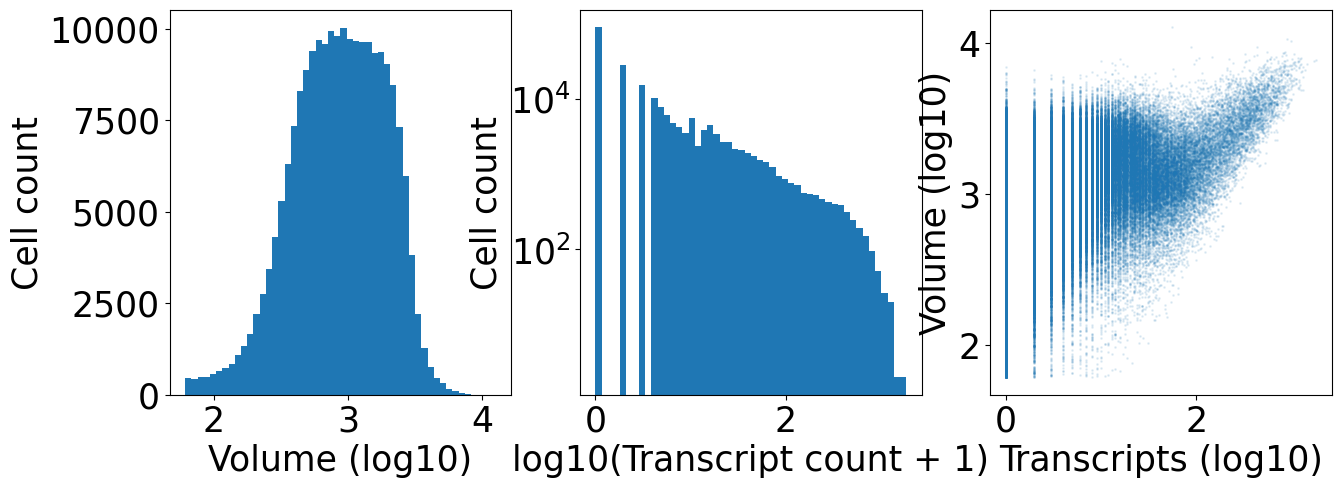

In [124]:
### plot QC metric
import seaborn
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
seaborn.distplot(np.log10(meta_all.volume), kde=False, hist_kws={"alpha": 1}) 
plt.xlabel('Volume (log10)')
plt.ylabel('Cell count')

plt.subplot(1,3,2)
g = seaborn.distplot(np.log10(meta_all.transcript_count+1), kde=False, hist_kws={"alpha": 1}) 
plt.xlabel('log10(Transcript count + 1)')
plt.ylabel('Cell count')
g.set_yscale('log')

plt.subplot(1,3,3)
plt.scatter(np.log10(meta_all['transcript_count']+1), np.log10(meta_all['volume']), s=1, alpha=0.1)
plt.xlabel('Transcripts (log10)')
plt.ylabel('Volume (log10)')

In [142]:
### filter cells with less than 10 transcripts - change cutoff depending on the exmperiment/sample
min_counts = 10
ser_sum = gex_all.T.sum(axis=0)
keep_cells = ser_sum[ser_sum >= min_counts].index.tolist()

meta_filtered = meta_all.loc[keep_cells]
meta_filtered
cellMetadata = [meta_filtered]
cellByGene = gex_all.loc[keep_cells]

print('before filter - ', str(len(ser_sum)), ' cells')
print('after filter  - ', str(len(keep_cells)), ' cells')


before filter -  213195  cells
after filter  -  45793  cells


/mnt/d/tmp/ipykernel_53646/2807068415.py:2: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = an.AnnData(cellByGene)
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/anndata/_core/anndata.py:798: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    [1257883200005100157, 1257883200006100037, 1257883200015100021, 1257883200015100038, 1257883200015100045]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


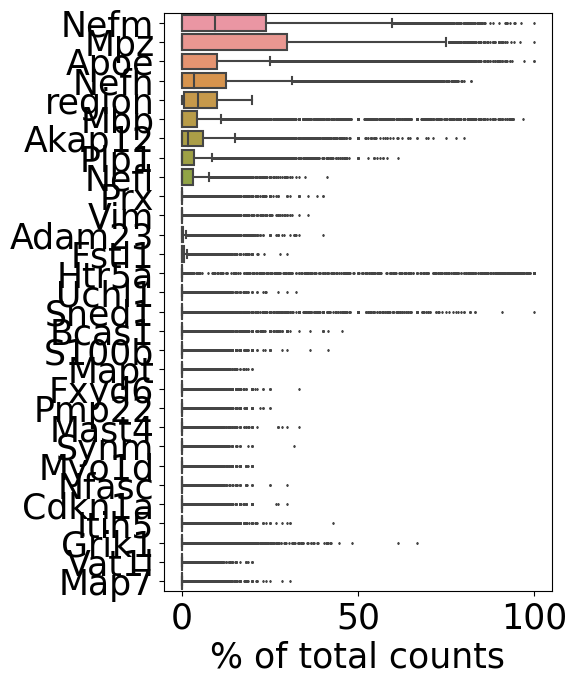

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


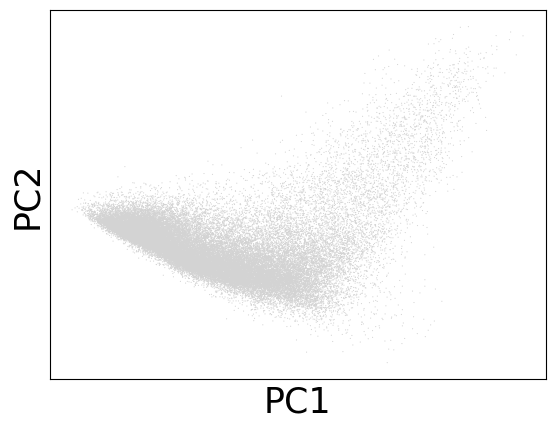

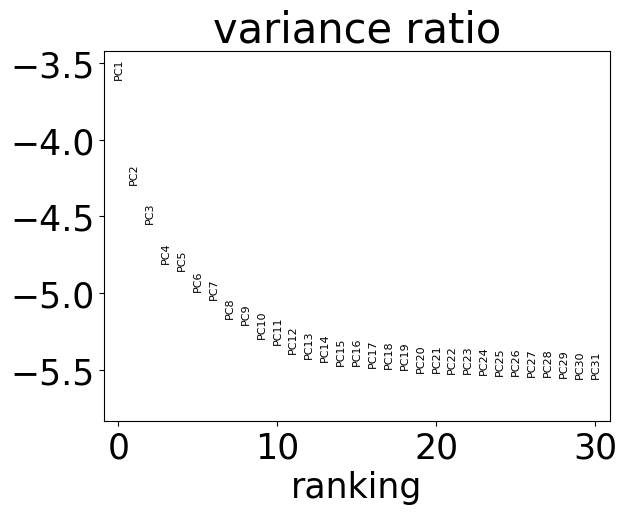

In [143]:
### create anndata - cell names from Vizgen are numeric, thus converting to str for anndata/scanpy bugs
ad = an.AnnData(cellByGene)
ad.obs = meta_filtered
ad.obs.index = ad.obs.index.map(str)

sc.pl.highest_expr_genes(ad, n_top=30, )
ad.layers['counts']=ad.X.copy()
adRaw = ad.copy()

sc.pp.normalize_total(ad)
sc.pp.log1p(ad)
sc.pp.scale(ad, max_value=10)

sc.tl.pca(ad, svd_solver='arpack')
sc.pl.pca(ad)
sc.pl.pca_variance_ratio(ad, log=True)
sc.pp.neighbors(ad, n_neighbors=12, n_pcs=20)
sc.tl.umap(ad)
sc.tl.leiden(ad, resolution = 1)

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


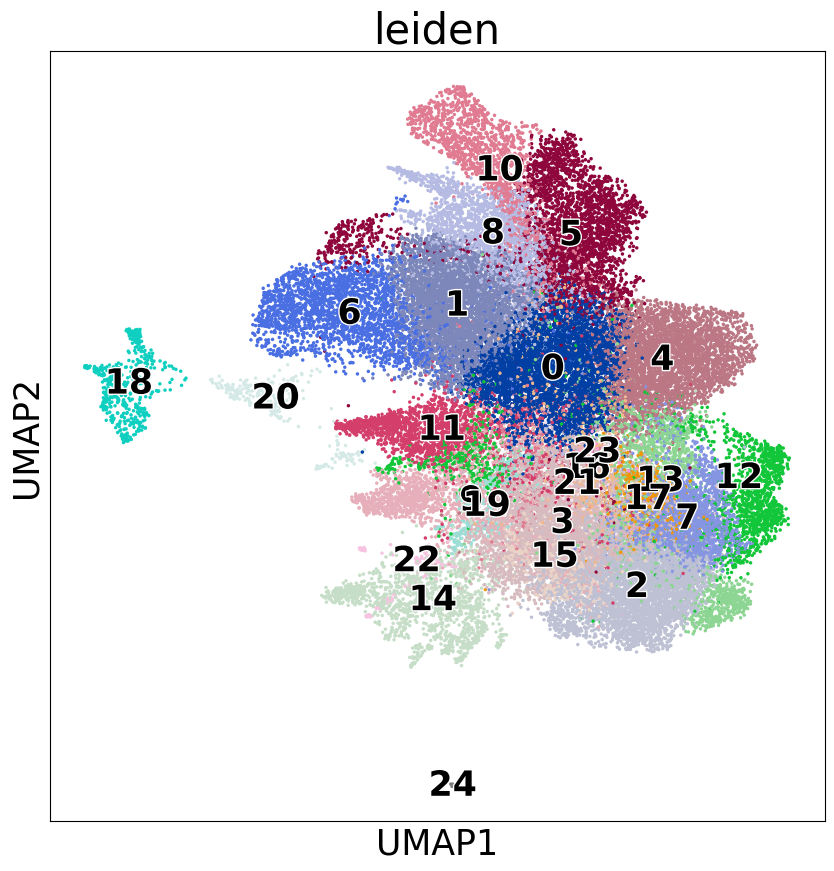

In [146]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(ad, s = 25, alpha=1, color='leiden', vmax=4, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

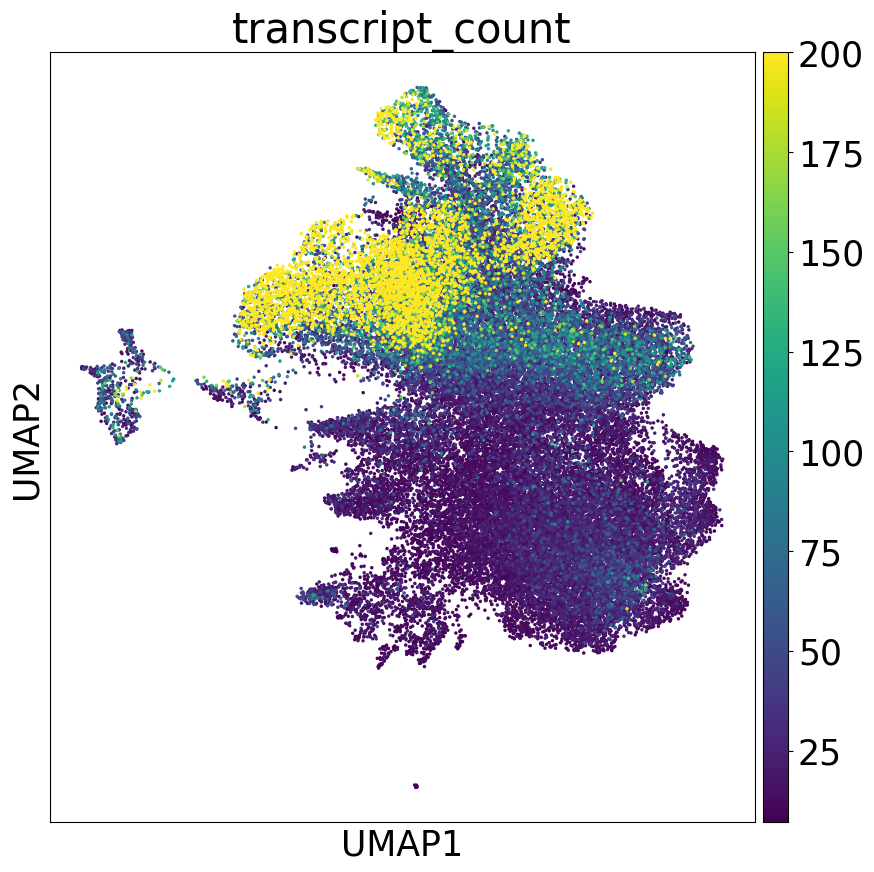

In [151]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(ad, s = 25, alpha=1, color='transcript_count', vmax = 200, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

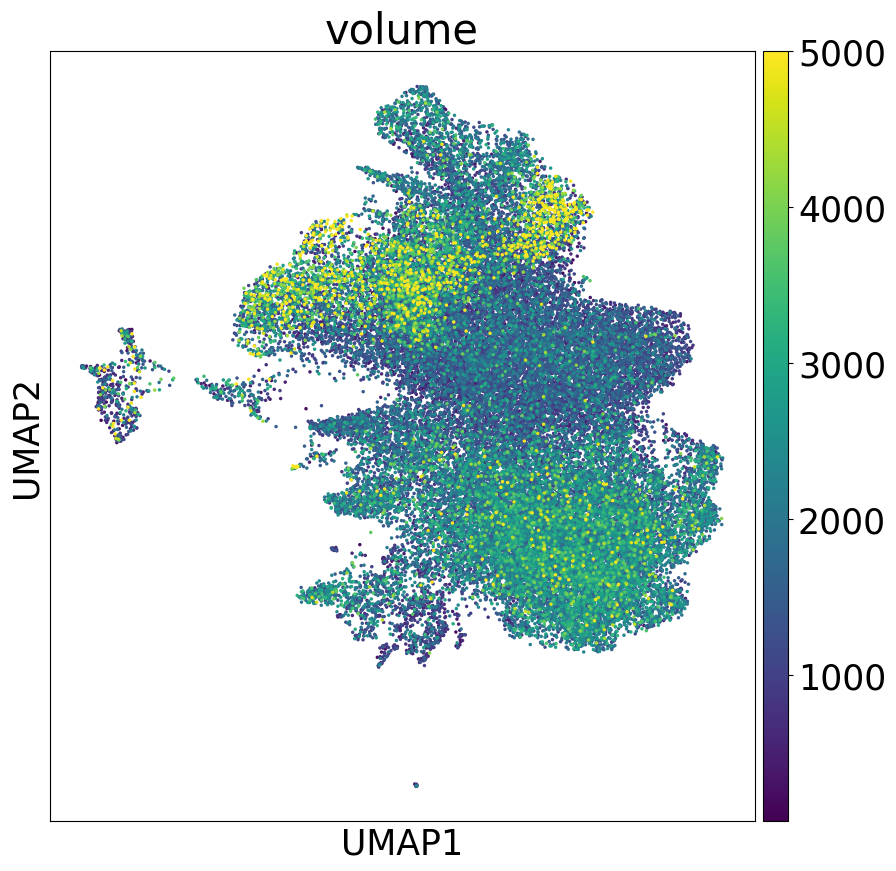

In [153]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(ad, s = 25, alpha=1, color='volume', vmax = 5000, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


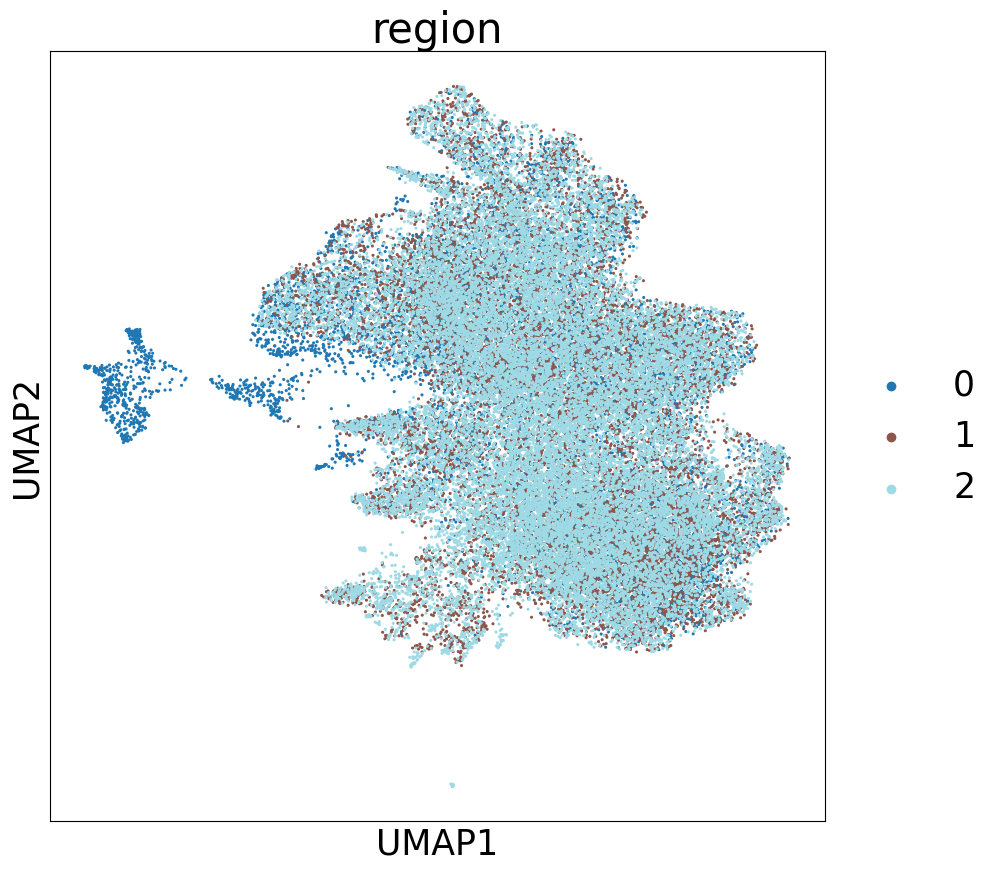

In [178]:
ad.obs['region'] = ad.obs['region'].map(str)
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(ad, s = 20, color='region', palette="tab20",
                   legend_fontsize=25, legend_fontoutline=2) 

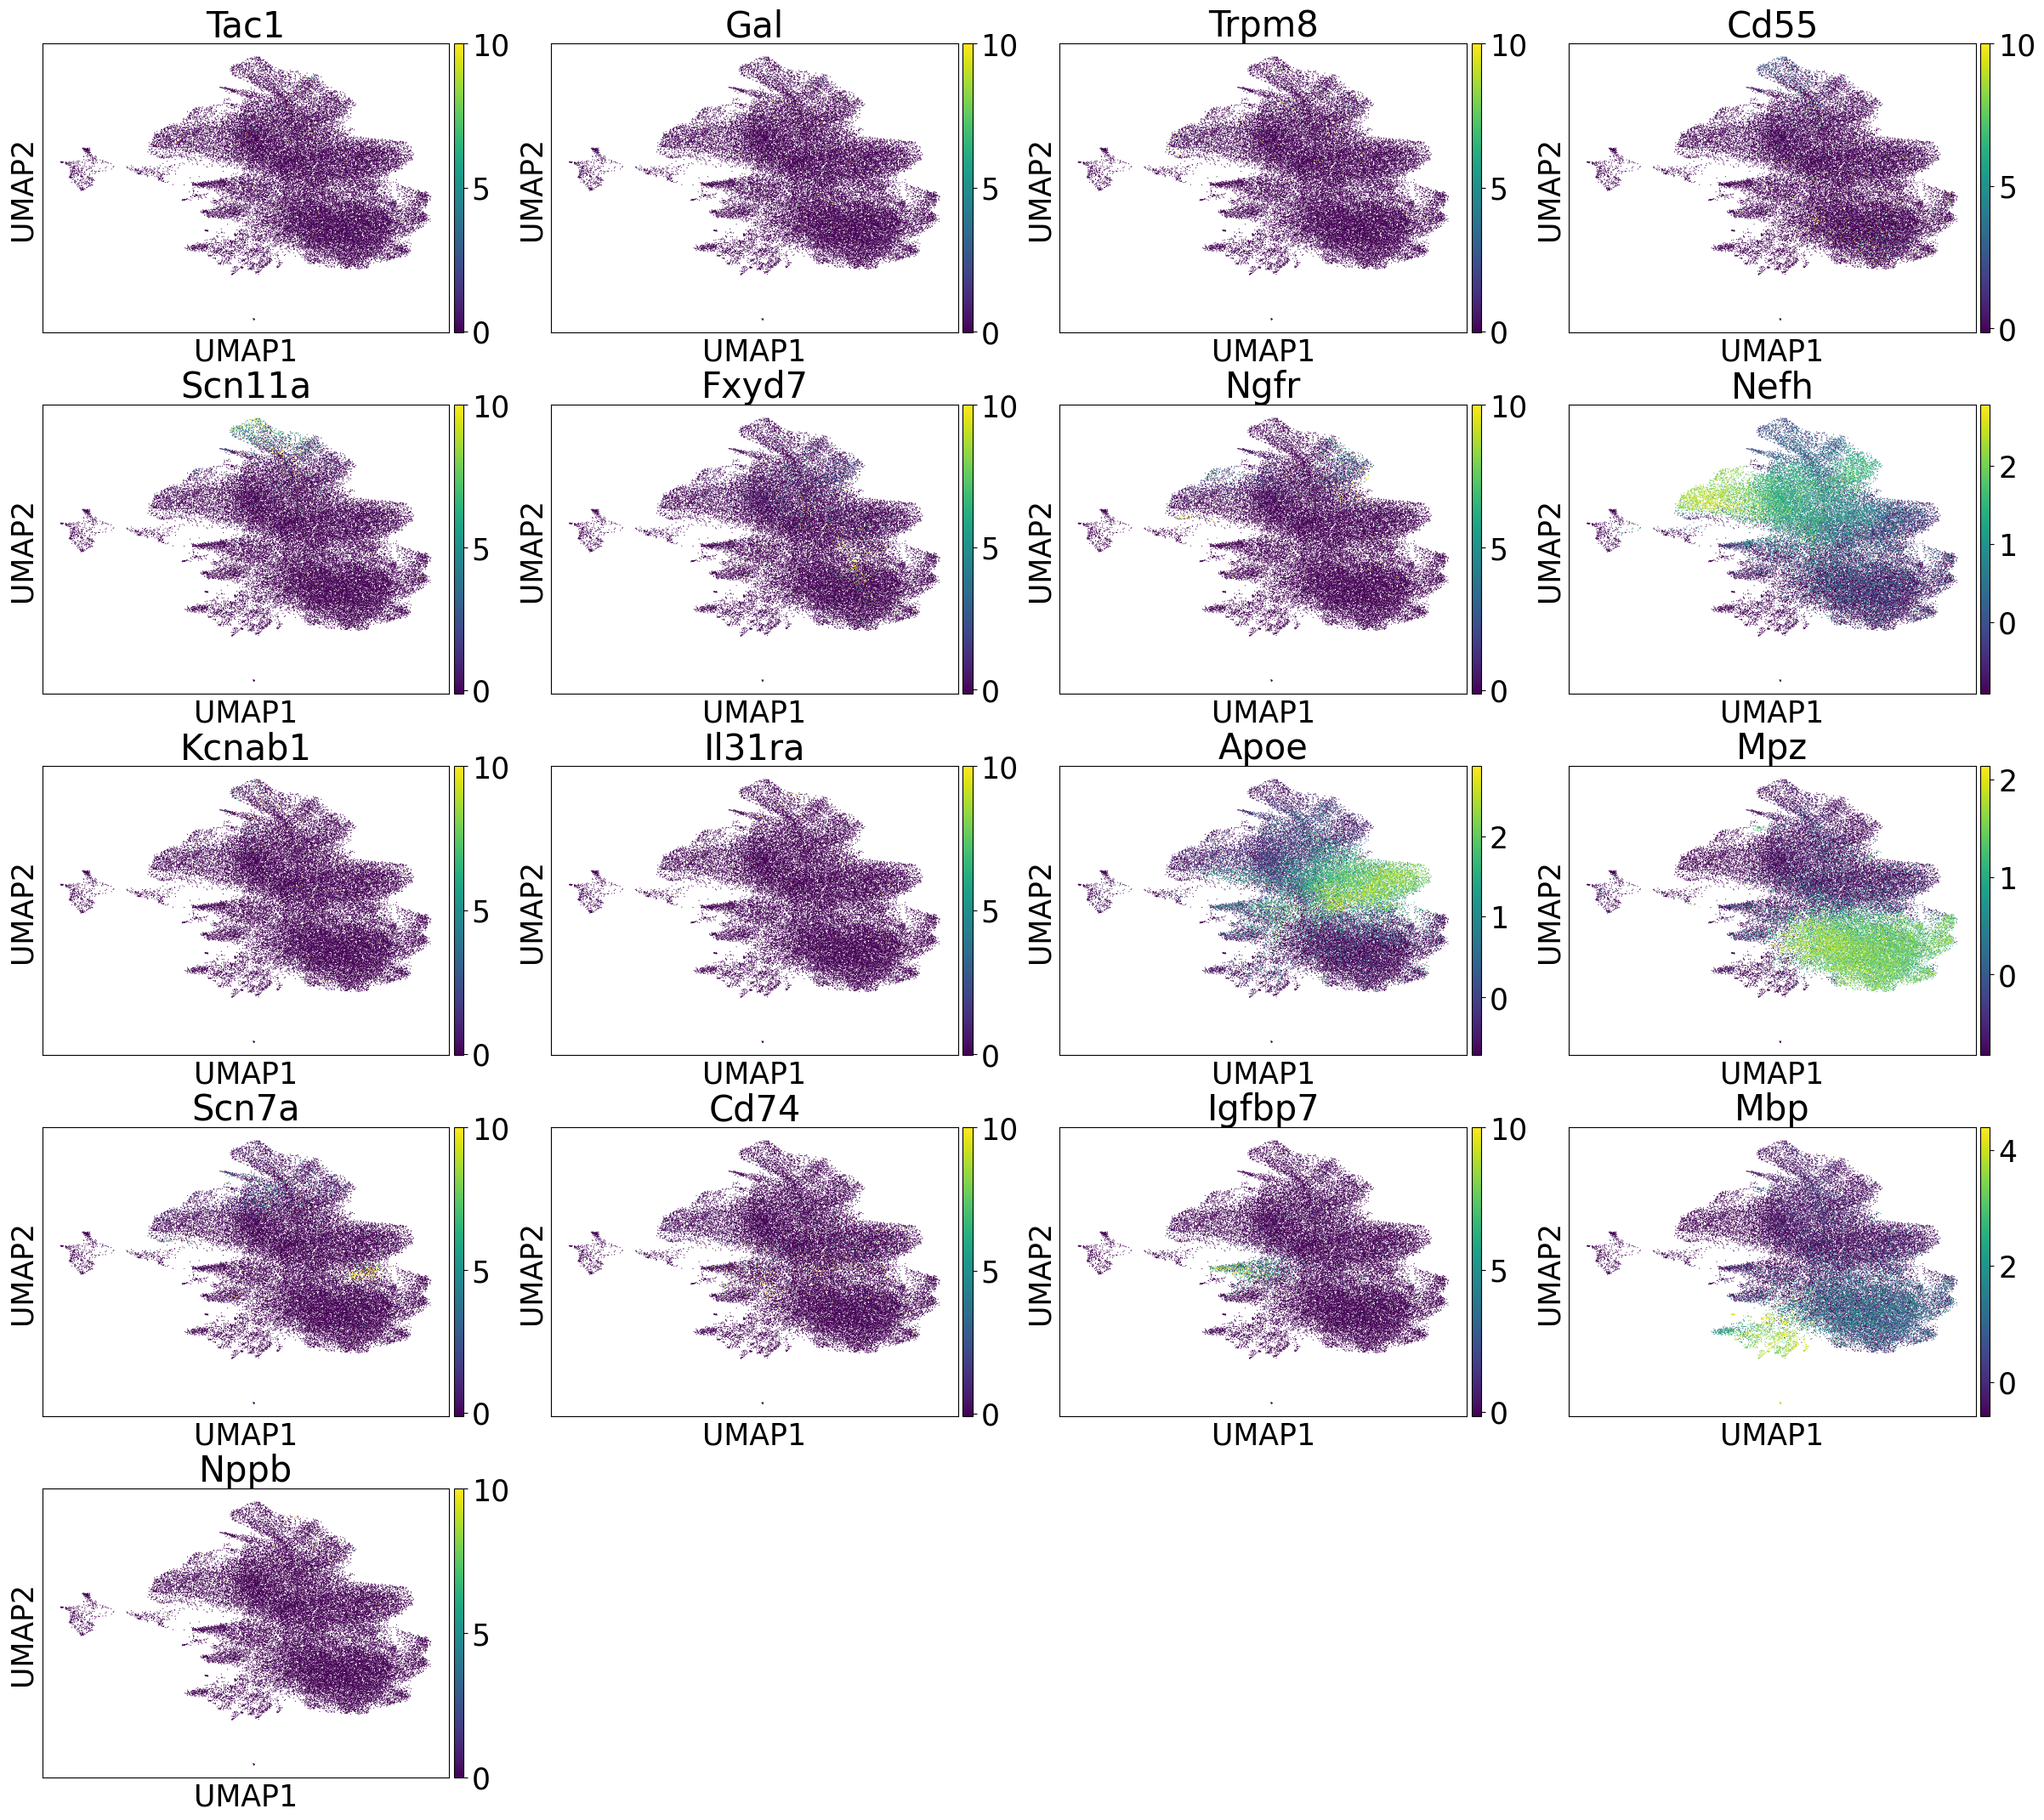

In [154]:
markers = ["Tac1","Gal","Trpm8","Cd55","Scn11a","Fxyd7","Ngfr","Nefh","Kcnab1","Il31ra","Apoe","Mpz","Scn7a","Cd74","Igfbp7", 'Mbp','Nppb']

sc.pl.umap(ad,  color=markers)


/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


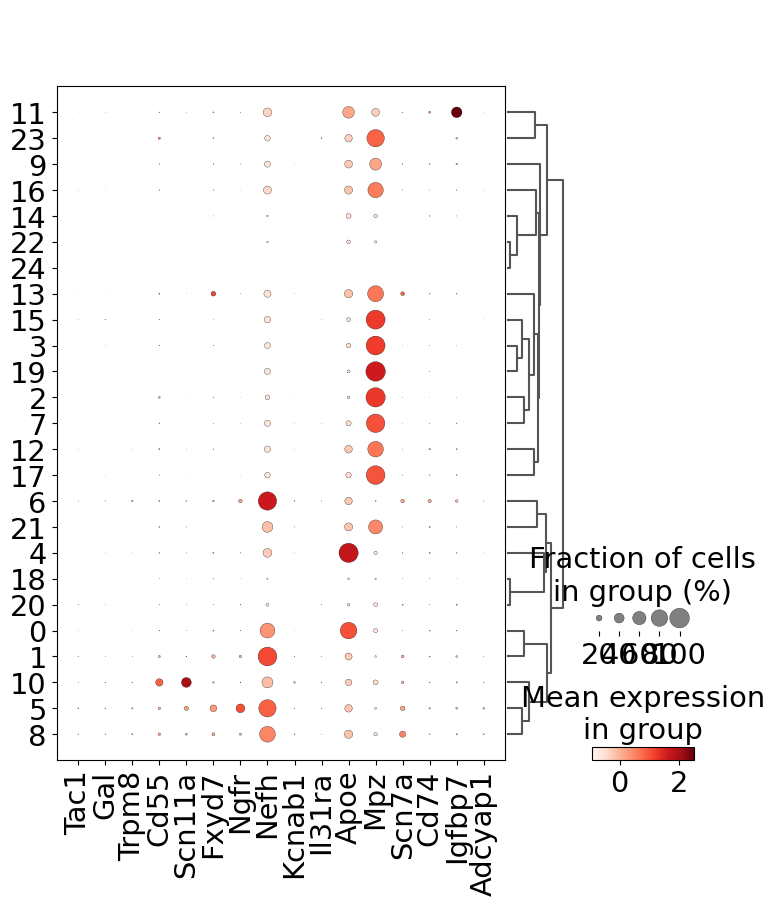

In [148]:
sc.tl.dendrogram(ad, groupby = 'leiden')
markers = ["Tac1","Gal","Trpm8","Cd55","Scn11a","Fxyd7","Ngfr","Nefh","Kcnab1","Il31ra","Apoe","Mpz","Scn7a","Cd74","Igfbp7", 'Adcyap1']
sc.pl.dotplot(ad,markers, groupby='leiden', dendrogram=True)

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


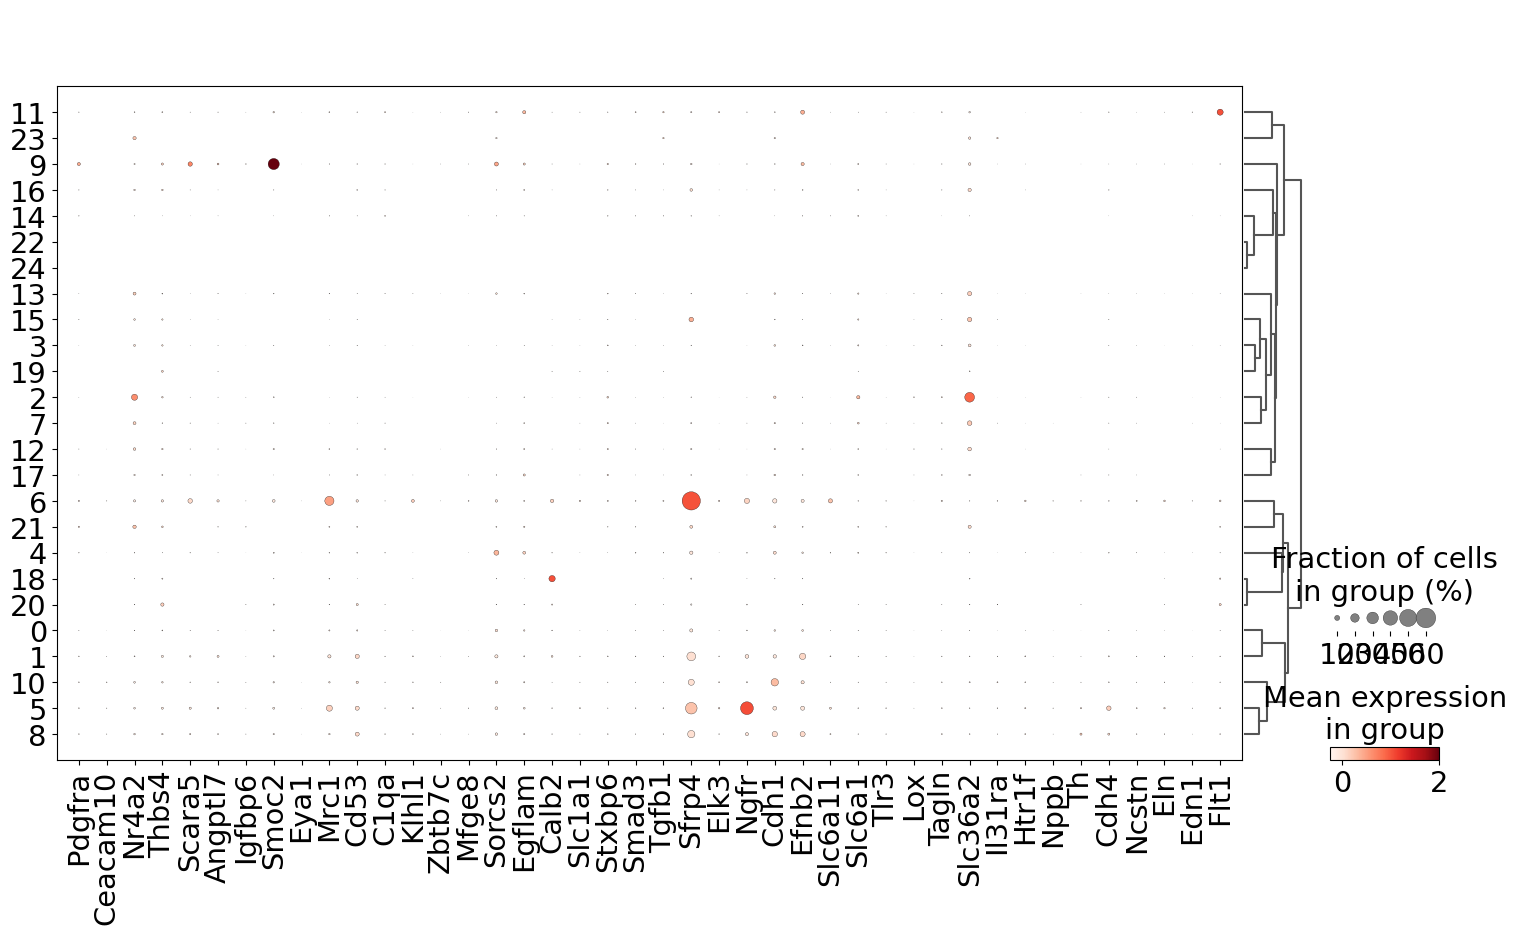

In [157]:
markers = ["Pdgfra","Ceacam10","Nr4a2","Thbs4","Scara5","Angptl7","Igfbp6","Smoc2","Eya1","Mrc1","Cd53","C1qa","Klhl1","Zbtb7c","Mfge8","Sorcs2","Egflam","Calb2","Slc1a1","Stxbp6","Smad3","Tgfb1","Sfrp4","Elk3","Ngfr","Cdh1","Efnb2","Slc6a11","Slc6a1","Tlr3","Lox","Tagln","Slc36a2","Il31ra","Htr1f","Nppb","Th","Cdh4","Ncstn","Eln","Edn1","Flt1"]
sc.pl.dotplot(ad,markers, groupby='leiden', dendrogram=True)

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups

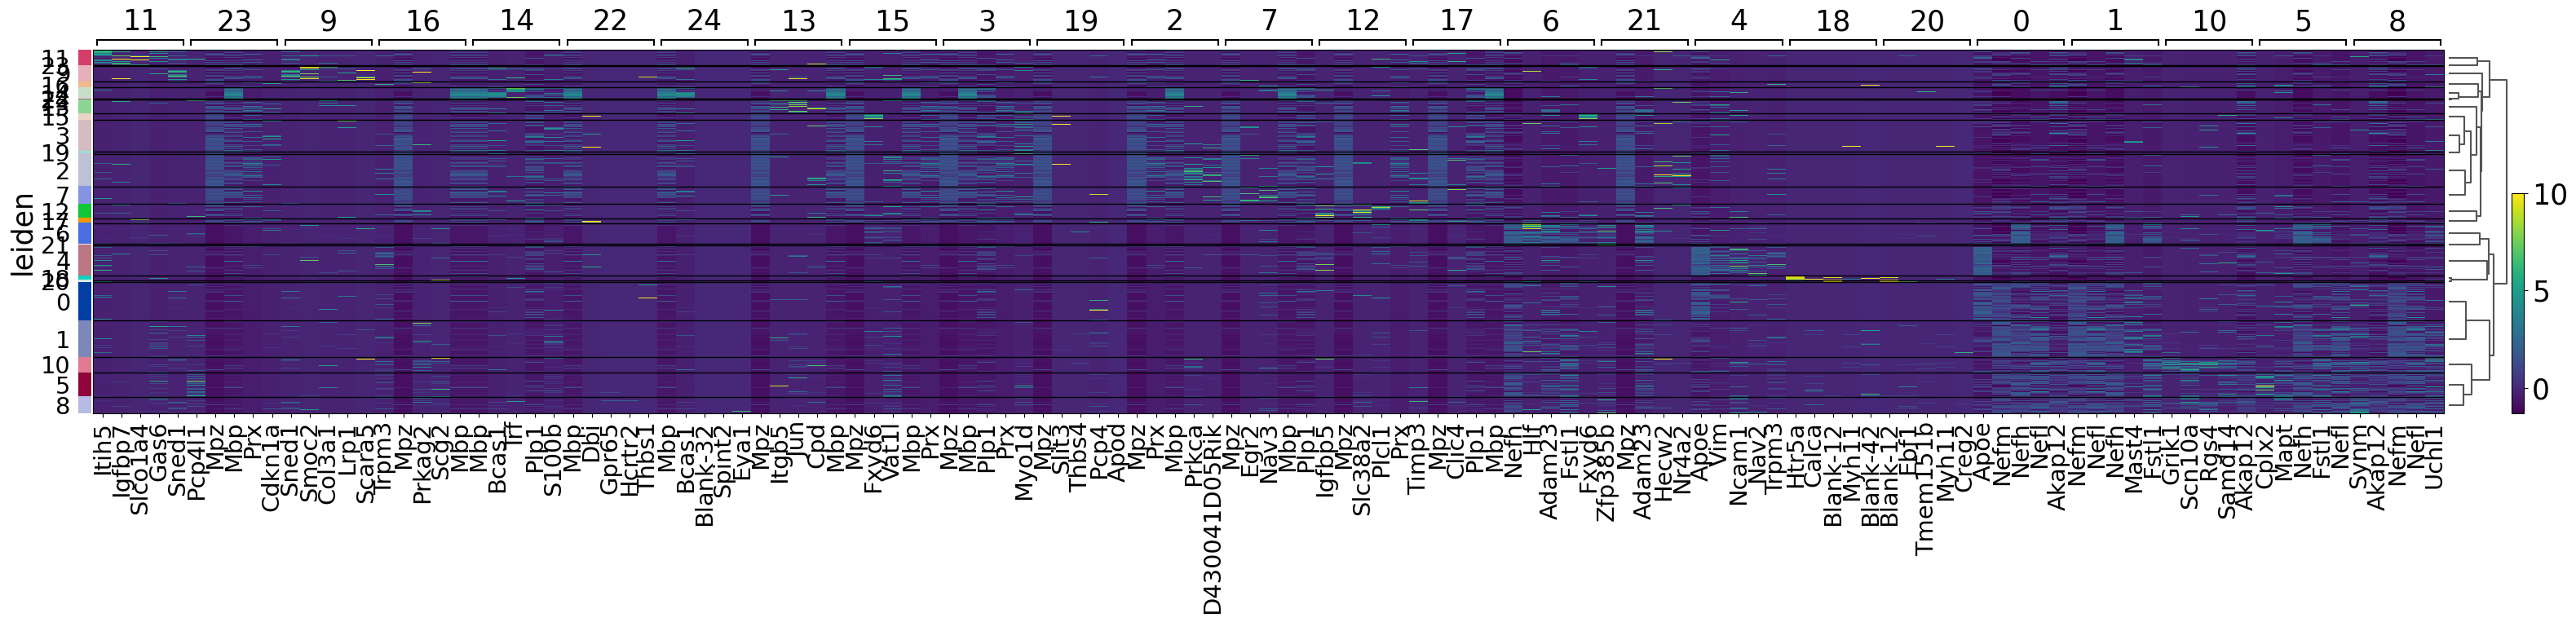

In [170]:
sc.tl.rank_genes_groups(ad, 'leiden', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups_heatmap(ad, n_genes=5, key="wilcoxon", groupby="leiden", show_gene_labels=True)


In [179]:
### annotate cell types by markers - experiment/sample dependent
cluster_annotation = {

    '4': 'SatGlia', 
    '13': 'Schwann', '15': 'Schwann', '3': 'Schwann', '19': 'Schwann', '2': 'Schwann', '7': 'Schwann', 
    '12': 'Schwann', '17': 'Schwann', '11': 'Vascular', '23': 'Vascular', 

    '18': 'low_qual', '20': 'low_qual', 

    '14':'PEP?', '22':'PEP?', '24':'PEP?',    
    '10': 'NP', 
    '5': 'NF', '8':'NF', 
 
    '0': 'NF?','1': 'NF?','6': 'NF?', '21': 'NF?',     
    '9':'?','16':'?',

     }
                        
# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
ad.obs['celltype'] = ad.obs['leiden'].map(cluster_annotation).astype('category')

/home/merfish/local/miniconda3/envs/scvi_env/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


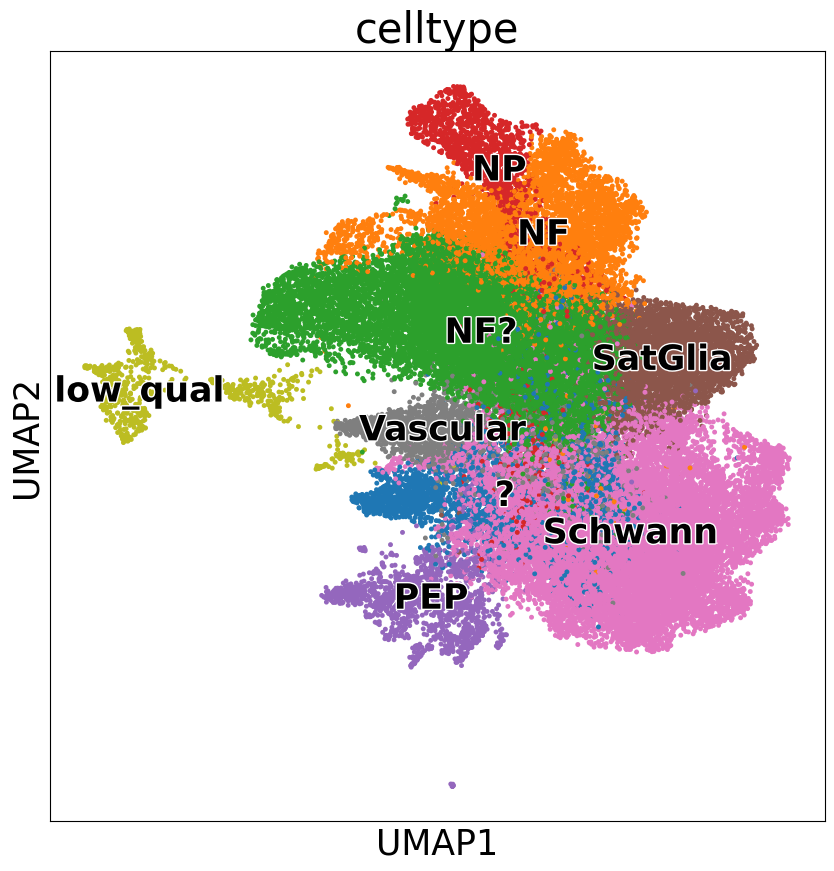

In [180]:
with rc_context({'figure.figsize': (10, 10)}):
    sc.pl.umap(ad, s = 50, alpha=1, color='celltype', vmax=4, legend_loc='on data',
                   legend_fontsize=25, legend_fontoutline=2) 

In [182]:
ad.write_h5ad("TG_prelim.h5ad")